# 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\kamil\Documents\6 Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path, '1', 'boat_data_cleaned.csv'))

In [5]:
df

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.00,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.00,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.00,Switzerland,Zugersee
...,...,...,...,...,...,...,...,...,...,...,...,...
5996,9877,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,1299,5100.00,Switzerland,Rhein
5997,9878,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,1917,5098.98,Switzerland,Lake of Zurich
5998,9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,288,5049.00,Switzerland,Bielersee
5999,9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,4499.00,Germany,Nordrhein-Westfalen


## Data Cleaning

In [6]:
# Drop the redundant columns
df1 = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
# Rename the columns.
df1.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [8]:
df = df1[['Length','Width','7days_views','EUR_price']]

In [9]:
df

,Length,Width,7days_views,EUR_price
0,4.00,1.50,75,3490.00
1,3.55,1.46,58,3399.00
2,4.35,1.75,239,3570.00
3,4.70,2.00,69,3500.00
4,4.40,1.65,113,4692.00
...,...,...,...,...
5996,7.20,2.70,1299,5100.00
5997,6.00,2.10,1917,5098.98
5998,6.00,1.62,288,5049.00
5999,4.40,1.80,354,4499.00


# 2. Standardizing the data

In [11]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36246306]
 [-1.50289423 -1.8047781  -0.62569917 -0.36260574]
 [-1.33784374 -1.53402117  0.43094436 -0.36233764]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36001879]
 [-1.32752808 -1.48733894  1.10229246 -0.3608811 ]
 [-1.49257857 -1.67406786  0.16824293 -0.36188986]]


In [12]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  7days_views  EUR_price
0    -1.410053 -1.767432    -0.526456  -0.362463
1    -1.502894 -1.804778    -0.625699  -0.362606
2    -1.337844 -1.534021     0.430944  -0.362338
3    -1.265634 -1.300610    -0.561483  -0.362447
4    -1.327528 -1.627386    -0.304620  -0.360579
...        ...       ...          ...        ...
5996 -0.749851 -0.647059     6.619022  -0.359939
5997 -0.997427 -1.207246    10.226789  -0.359940
5998 -0.997427 -1.655395     0.716997  -0.360019
5999 -1.327528 -1.487339     1.102292  -0.360881
6000 -1.492579 -1.674068     0.168243  -0.361890

[6001 rows x 4 columns]


## 3. The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

In [15]:
score 

[-24003.999999999996,
 -15675.35375033844,
 -11918.772196474665,
 -9074.402980667921,
 -7104.894033161085,
 -6077.695575086419,
 -5329.902499004418,
 -4612.462930738143,
 -4125.041469408063]

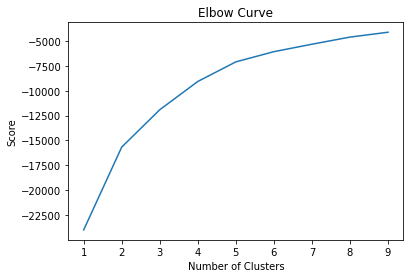

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### It is noticed that after 5 noticable straightenning line occurs. Optimal count for cluster is five.

# 4. k-means clustering

In [17]:
kmeans = KMeans(n_clusters = 5) 

In [18]:
kmeans.fit(df)

KMeans(n_clusters=5)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

In [21]:
df.head()

,Length,Width,7days_views,EUR_price,clusters
0,-1.410053,-1.767432,-0.526456,-0.362463,1
1,-1.502894,-1.804778,-0.625699,-0.362606,1
2,-1.337844,-1.534021,0.430944,-0.362338,1
3,-1.265634,-1.300610,-0.561483,-0.362447,1
4,-1.327528,-1.627386,-0.304620,-0.360579,1


In [22]:
df['clusters'].value_counts()

1    2917
2    2236
4     498
0     320
3      30
Name: clusters, dtype: int64

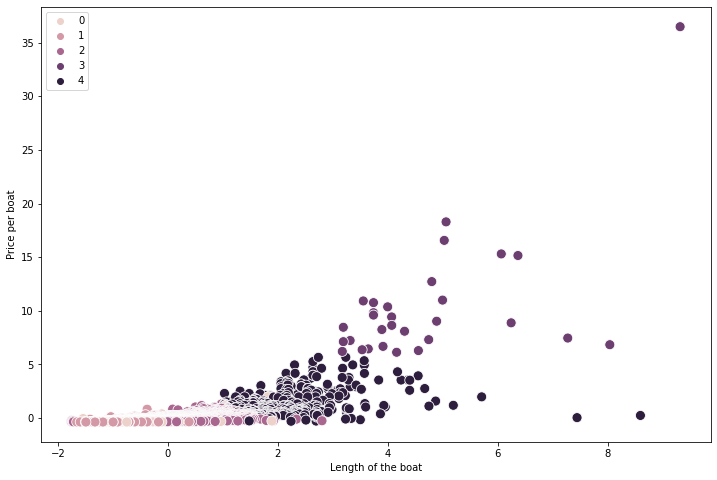

In [23]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['EUR_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

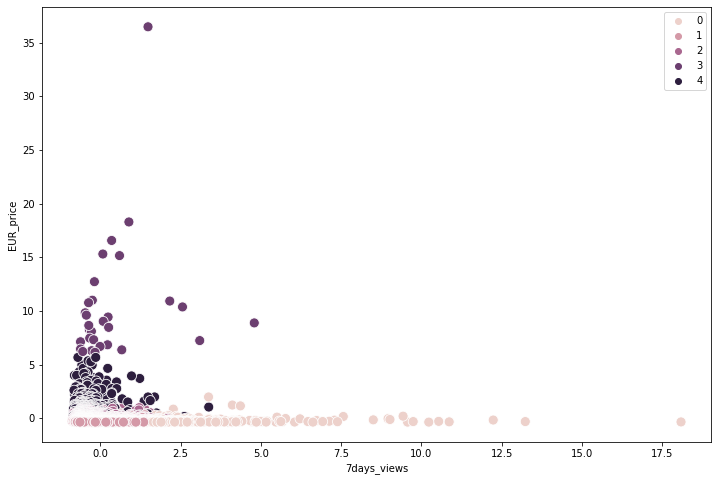

In [24]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['7days_views'], y=df['EUR_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('7days_views') 
plt.ylabel('EUR_price') 
plt.show()

### The two graphs does not entirely makes sense or give a great insight to the relationship between the cost of the boat and either of the Length or Views of each boat. This gives a suggestion that there are other important factors that are inclusively and would all together be determinant of the boat price

In [29]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'

In [30]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'EUR_price':['mean', 'median']})

Length               Width           7days_views            \
                    mean    median      mean    median        mean    median   
cluster                                                                        
dark purple     2.101251  1.921903  1.912740  1.710394   -0.350853 -0.473916   
dent purple     4.686912  4.116043  3.758810  3.451641    0.398253 -0.091540   
purple          0.436039  0.394155  0.570095  0.566679   -0.298858 -0.395106   
whitish pink   -0.531707 -0.646695 -0.549668 -0.749760    3.062702  2.427475   
whitish purple -0.682848 -0.692084 -0.741908 -0.787105   -0.051094 -0.170350   

                EUR_price            
                     mean    median  
cluster                              
dark purple      1.219128  0.886187  
dent purple     10.398493  8.764783  
purple          -0.025118 -0.081332  
whitish pink    -0.241490 -0.310144  
whitish purple  -0.269331 -0.292678

###  The obtained data do not suggest a great influence on the relationship between the columns. However, the dent purple cluster has best statistics of the lots. The median number of lengths, width and price is highest and significantly larger than at  the other four. This shows that lenghth and width of the boat influence the boat size, and the bigger the boat is - the bigger the price is. Nevertheless, there are other important characteristics variables that could be considered  influencing the price of the boat. 